In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# 设置随机种子以确保结果可复现
np.random.seed(42)

In [2]:
def plot_fig(colors: list, 
          validation_true: list,
          validation_pred: list, 
          test_true: list, 
          test_pred: list,
          validation_r2: list,
          test_r2: list) -> None:
    # 创建图表
    fig = plt.figure(figsize=(10, 10))
    gs = GridSpec(4, 4, figure=fig, height_ratios=[1.8, 3, 3, 3], width_ratios=[3, 3, 3, 1.8])  # 1.8为直方图的比例
    # 主散点图
    ax_scatter = fig.add_subplot(gs[1:4, 0:3])
    sns.scatterplot(x=validation_true, y=validation_pred, color=colors[0], alpha=0.5, ax=ax_scatter)
    sns.scatterplot(x=test_true, y=test_pred, color=colors[1], alpha=0.5, ax=ax_scatter)
    sns.regplot(x=validation_true, y=validation_pred, scatter=False, color=colors[0], ci=95, line_kws={'linestyle': '--'}, ax=ax_scatter)  # 回归线及95%置信区间
    sns.regplot(x=test_true, y=test_pred, scatter=False, color=colors[1], ci=95, ax=ax_scatter)
    ax_scatter.text(400, -300, f'Validation $R^2$ = {validation_r2:.3f}', fontsize=13, ha='right', color=colors[0])  # 添加R^2值
    ax_scatter.text(400, -330, f'Test $R^2$ = {test_r2:.3f}', fontsize=13, ha='right', color=colors[1])
    ax_scatter.set_xlabel('True Values', fontsize=14)
    ax_scatter.set_ylabel('Predicted Values', fontsize=14)
    ax_scatter.spines['right'].set_visible(False)
    ax_scatter.spines['top'].set_visible(False)

    # 上边的直方图 (True Values)
    ax_hist_top = fig.add_subplot(gs[0, 0:3])
    ax_hist_top.hist([validation_pred, test_pred], bins=30, density=True, color=[colors[0], colors[1]], edgecolor='black', 
                    linewidth=1.2, stacked=True)
    ax_hist_top.spines['right'].set_visible(False)
    ax_hist_top.spines['left'].set_visible(False)
    ax_hist_top.spines['top'].set_visible(False)
    ax_hist_top.tick_params(axis='y', which='both', length=0) 
    ax_hist_top.set_xticklabels([])
    ax_hist_top.set_yticklabels([])
    ax_hist_top.set_xlabel('')
    ax_hist_top.set_ylabel('')

    # 右边的直方图 (Predicted Values)
    ax_hist_right = fig.add_subplot(gs[1:4, 3])
    ax_hist_right.hist([validation_pred, test_pred], bins=30, density=True, color=[colors[0], colors[1]], edgecolor='black', 
                    linewidth=1.2, orientation='horizontal', stacked=True)
    ax_hist_right.spines['right'].set_visible(False)
    ax_hist_right.spines['bottom'].set_visible(False)
    ax_hist_right.spines['top'].set_visible(False)
    ax_hist_right.tick_params(axis='x', which='both', length=0) 
    ax_hist_right.set_xticklabels([])
    ax_hist_right.set_yticklabels([])
    ax_hist_right.set_xlabel('')
    ax_hist_right.set_ylabel('')

    # 自定义图例映射
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Validation', markerfacecolor=colors[0], markersize=7, alpha=0.7),
        Line2D([0], [0], marker='o', color='w', label='Test', markerfacecolor=colors[1], markersize=7, alpha=0.7),
        Line2D([0], [0], color=colors[0], linestyle='--', lw=2, label='Validation'),
        Line2D([0], [0], color=colors[1], lw=2, label='Test'),
        Patch(facecolor=colors[0], alpha=0.3, label='Validation 95% CI'), 
        Patch(facecolor=colors[1], alpha=0.3, label='Test 95% CI'),
        Patch(facecolor=colors[0], edgecolor='black', linewidth=1.2, label='Validation hist'), 
        Patch(facecolor=colors[1], edgecolor='black', linewidth=1.2, label='Test hist') 
    ]
    ax_scatter.legend(handles=legend_elements, fontsize=12, loc='upper left')  # 添加图例

    fig.suptitle('Scatter Plot of True vs Predicted Values', fontsize=18)
    plt.tight_layout()
    plt.show()

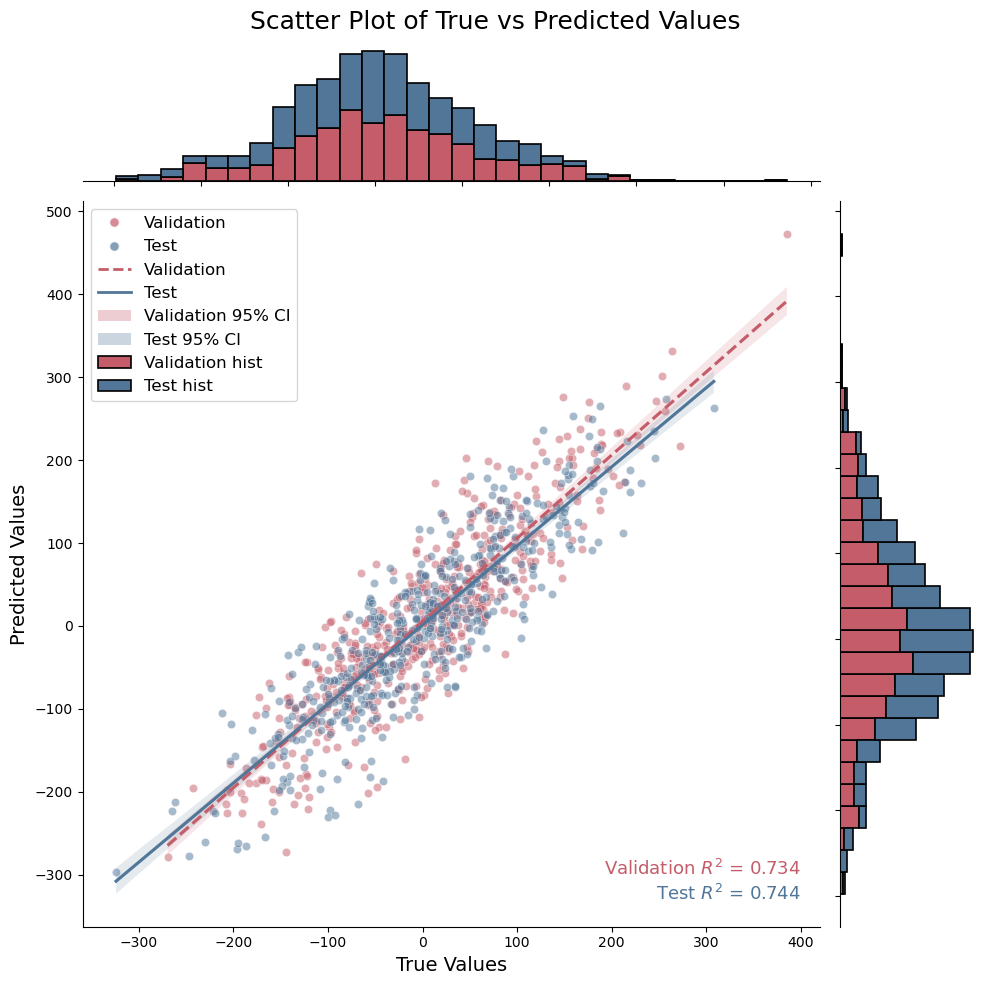

In [ ]:
# 生成示例数据
true_values = np.random.normal(loc=0, scale=100, size=1000)
predicted_values = true_values + np.random.normal(loc=0, scale=50, size=1000)
validation_indices = np.random.choice([True, False], size=true_values.shape[0])  # 分割数据为验证集和测试集
validation_true = true_values[validation_indices]
validation_pred = predicted_values[validation_indices]
test_true = true_values[~validation_indices]
test_pred = predicted_values[~validation_indices]
validation_r2 = r2_score(validation_true, validation_pred)  # 计算R^2值
test_r2 = r2_score(test_true, test_pred)

colors = ['#c45c69','#517698']  # 颜色
plot_fig(colors, validation_true, validation_pred, test_true, test_pred, validation_r2, test_r2)

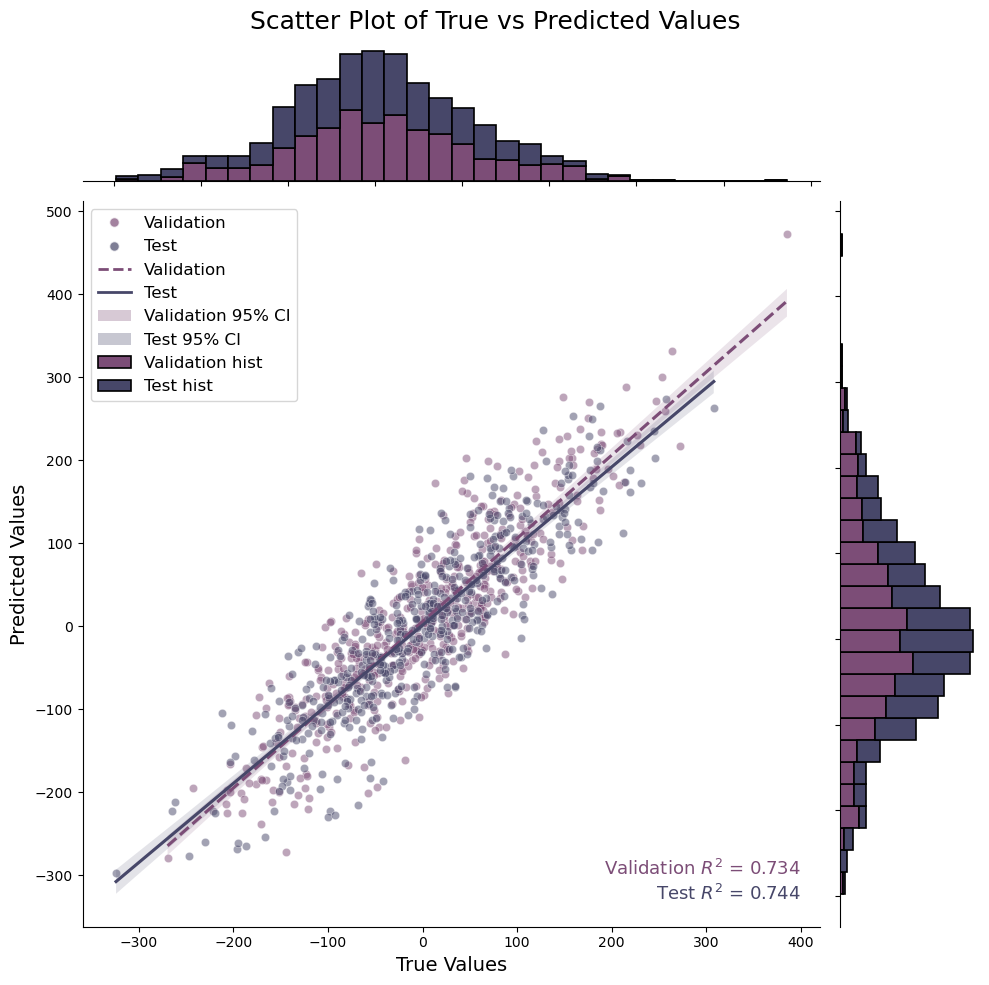

In [4]:
colors = ['#7c4d77','#474769']  # 颜色
plot_fig(colors, validation_true, validation_pred, test_true, test_pred, validation_r2, test_r2)

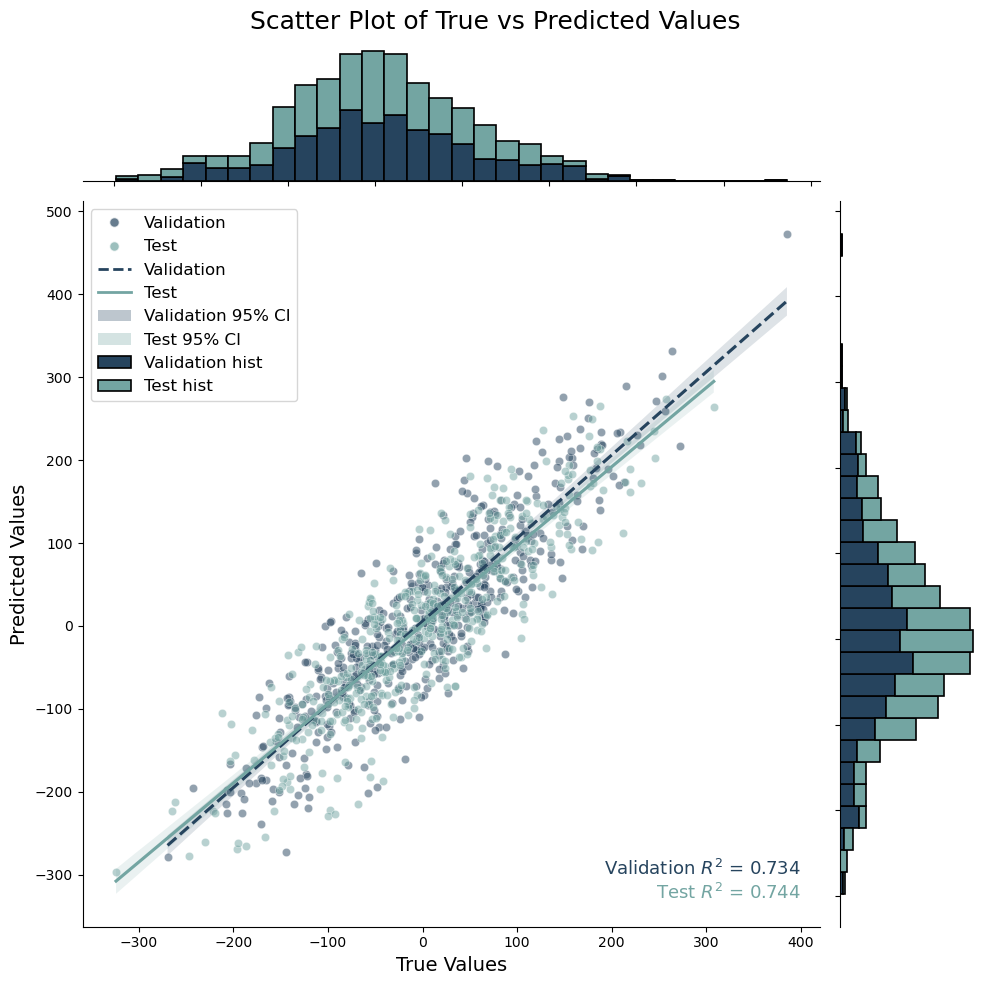

In [5]:
colors = ['#26445e','#73a5a2']  # 颜色
plot_fig(colors, validation_true, validation_pred, test_true, test_pred, validation_r2, test_r2)